# Map of London

Having typically used  GIS tools in R, I thought it was about time I gave Python a go. Here i'm trying to build a map of London with some data in it. I found this tutorial online so many thanks to Ben Dexter Cooley @ TowardsDataScience. 

### Libraries 

In [14]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import geopandas as gpd


### Loading the data

<Axes: >

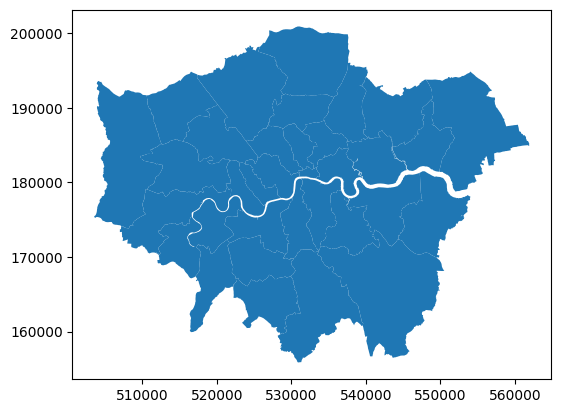

In [15]:
fp='statistical-gis-boundaries-london\statistical-gis-boundaries-london\ESRI'

map_df=gpd.read_file(fp)
#print(map_df)

map_df.plot()

### Loading some data to put into the map

Had an interesting problem with the encoding on this one, luckily the pkg 'chardet' exsits! This tells me which encoding it has and i can then use pandas to load it porperly with the identified encoding.

In [16]:
import chardet

with open('london-borough-profiles.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result)

df_lndn_borough = pd.read_csv('london-borough-profiles.csv', encoding='ISO-8859-1')

print(df_lndn_borough .head())

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}
        Code             Area_name Inner/_Outer_London  \
0  E09000001        City of London        Inner London   
1  E09000002  Barking and Dagenham        Outer London   
2  E09000003                Barnet        Outer London   
3  E09000004                Bexley        Outer London   
4  E09000005                 Brent        Outer London   

   GLA_Population_Estimate_2017  GLA_Household_Estimate_2017  \
0                        8800.0                       5326.0   
1                      209000.0                      78188.0   
2                      389600.0                     151423.0   
3                      244300.0                      97736.0   
4                      332100.0                     121048.0   

   Inland_Area_(Hectares)  Population_density_(per_hectare)_2017  \
0                   290.0                                   30.3   
1                  3611.0                                   57.9   

Crikey, x84 cols! Lets have a look and see which ones we'd like to use

In [17]:
print(df_lndn_borough .columns)

Index(['Code', 'Area_name', 'Inner/_Outer_London',
       'GLA_Population_Estimate_2017', 'GLA_Household_Estimate_2017',
       'Inland_Area_(Hectares)', 'Population_density_(per_hectare)_2017',
       'Average_Age,_2017', 'Proportion_of_population_aged_0-15,_2015',
       'Proportion_of_population_of_working-age,_2015',
       'Proportion_of_population_aged_65_and_over,_2015',
       'Net_internal_migration_(2015)', 'Net_international_migration_(2015)',
       'Net_natural_change_(2015)',
       '%_of_resident_population_born_abroad_(2015)',
       'Largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_largest_migrant_population_(2011)',
       'Second_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_second_largest_migrant_population_(2011)',
       'Third_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_third_largest_migrant_population_(2011)',
       '%_of_population_from_BAME_groups_(2016)',
       '%_people_aged_3+_whose_main_

Let's slim down our selection a bit, i'm also going to rename the cols as they are a bit long.

In [18]:
df_lndn_data = df_lndn_borough[['Area_name', 'Inner/_Outer_London', 'Happiness_score_2011-14_(out_of_10)','%_of_area_that_is_Greenspace,_2005', 'Household_Waste_Recycling_Rate,_2014/15' ]]

df_lndn_rename=df_lndn_data.rename(index=str, columns={'Happiness_score_2011-14_(out_of_10)': 'happiness',
                                         '%_of_area_that_is_Greenspace,_2005': 'green_space',
                                         'Household_Waste_Recycling_Rate,_2014/15': 'recycle_rate'}, inplace=False)

df_lndn_rename.head()

,Area_name,Inner/_Outer_London,happiness,green_space,recycle_rate
0,City of London,Inner London,6.0,4.8,34.4
1,Barking and Dagenham,Outer London,7.1,33.6,23.4
2,Barnet,Outer London,7.4,41.3,38.0
3,Bexley,Outer London,7.2,31.7,54.0
4,Brent,Outer London,7.2,21.9,35.2


Here i'm just merging the map data with the census style data, using the 'Area_name' (borough) as the index.

In [19]:
merged = map_df.set_index('NAME').join(df_lndn_rename.set_index('Area_name'))

merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Inner/_Outer_London,happiness,green_space,recycle_rate
NAME,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Outer London,7.4,36.4,45.7
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Outer London,7.2,37.1,39.9
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Outer London,7.4,57.8,48.0
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Outer London,7.4,39.6,34.5
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Outer London,7.3,30.9,40.1


And here's the actual map, I chose to use green_space, as if I choose to move to London, i'll need plently of places to walk my mad spaniel!

(<Figure size 1000x600 with 1 Axes>,)

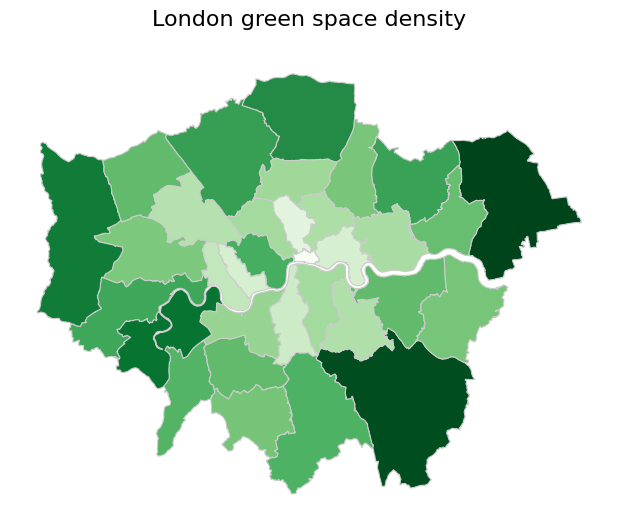

In [20]:
variable = 'green_space'

vmin, vmax = 120, 220

fig, ax = plt.subplots(1, figsize=(10, 6))

merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.set_axis_off()

ax.set_title('London green space density', fontdict={'fontsize': 16}, pad=20)

fig, 

Right, that looks good but isn't very informative. What I really need is a legend!

Text(0.5, 1.0, 'London green space density')

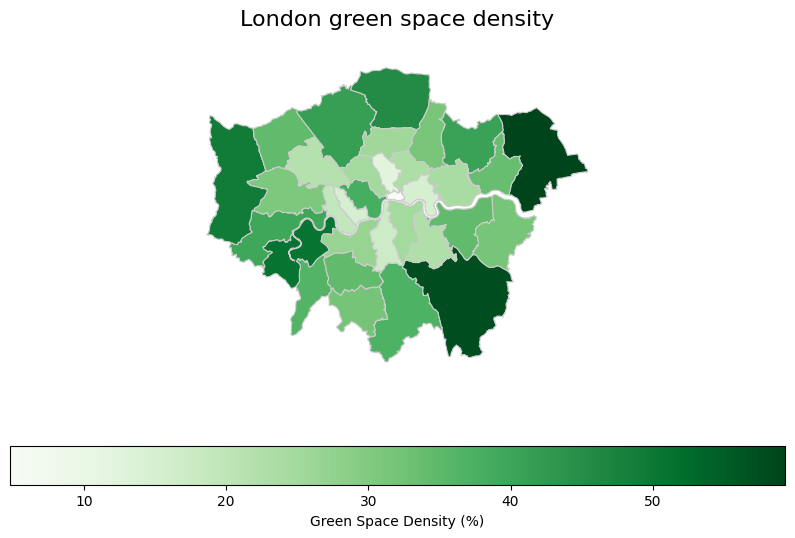

In [21]:
variable = 'green_space'

vmin, vmax = 120, 220

fig, ax = plt.subplots(1, figsize=(10, 6))

merged.plot(column=variable,
            cmap='Greens',
            linewidth=0.8, 
            ax=ax,
            edgecolor='0.8',
            legend=True,  
            legend_kwds={
        'label': "Green Space Density (%)",
        'orientation': "horizontal"  })

ax.set_axis_off()

ax.set_title('London green space density', fontdict={'fontsize': 16}, pad=20)

Thats better. The next step will be to add turn this into an interactive map, maybe as a dashboard.